In [1]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from python_files.maxent import MaxEnt
import python_files.densities as d

from scipy.stats import lognorm

In [2]:

def f_moments(x, k):
    return np.array([x**i for i in range(1, k+1)])

def mean_lognorm(mu, s2):
    return np.exp(mu + s2/2)

def var_lognorm(mu, s2):
    return (np.exp(s2) - 1)*np.exp(2*mu + s2)

def nth_moment_lognormal(n,mu,s2):
    return np.exp(n*mu + n**2 * s2/2)
    
# def nth_moment_lognormal_standardized(n,mu,s2):
#     if(n==1):
#         return 0
#     if(n==2):
#         return 1
#     if(n==3):
#         return (np.exp(s2)+2)*np.sqrt(np.exp(s2)-1) # skewness
#     if(n==4):
#         ex_s = np.exp(s2)
#         return ex_s**4 + 2*ex_s**3 + 3*ex_s**2 - 3 # kurtosis


def b_moment_lognormal(mu, s2, k):
    return np.array([nth_moment_lognormal(n,mu,s2) for n in range(1, k+1)])

# def b_SkewKurt_lognormal_standardized(mu, s2):
#     return np.array([nth_moment_lognormal_standardized(n,mu,s2) for n in range(1,5)])

def pdf_lognorm(x,mu,s2):
    return  lognorm.pdf(x,
                        s=s2,
                        loc=0,
                        scale=np.exp(mu)) 

# def lambda_actual_lognormal(mu, s2):
#     return np.array([-1 + mu/s2, -0.5/s2])


181.15220369401933


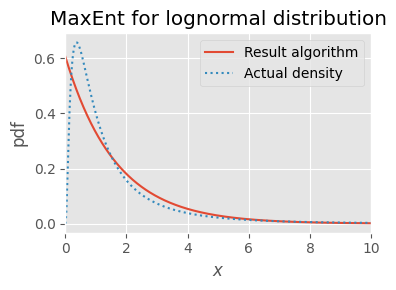

Lagrange parameters: [-0.60653066]


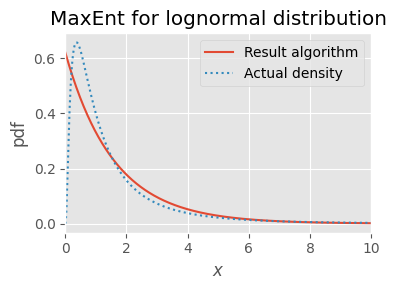

Lagrange parameters: [-0.63172735  0.00318493]


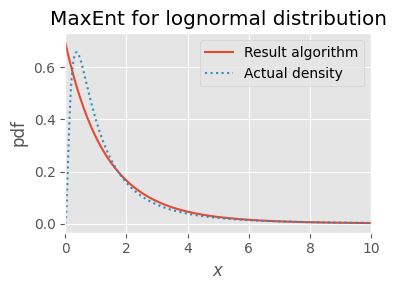

Lagrange parameters: [-7.58766805e-01  2.05888316e-02 -1.97255391e-04]


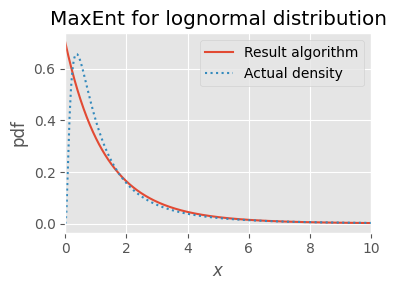

Lagrange parameters: [-7.73411493e-01  2.33306870e-02 -3.03730301e-04  1.08433686e-06]


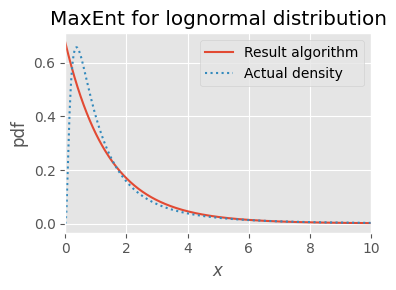

Lagrange parameters: [-7.08126737e-01  6.23868915e-03  8.14376033e-04 -2.12556909e-05
  9.20815858e-08]
The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = 216.079
  Lambda_2 = -82.267
  Lambda_3 = 4.738
  Lambda_4 = -0.108
  Lambda_5 = 0.001
  Lambda_6 = -0.000
  Lambda_7 = 0.000


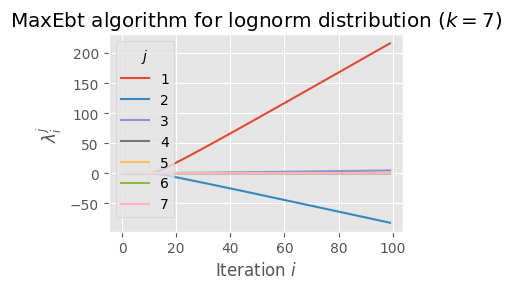

The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = -23.702
  Lambda_2 = 3.328
  Lambda_3 = -0.174
  Lambda_4 = 0.004
  Lambda_5 = -0.000
  Lambda_6 = 0.000
  Lambda_7 = -0.000
  Lambda_8 = 0.000


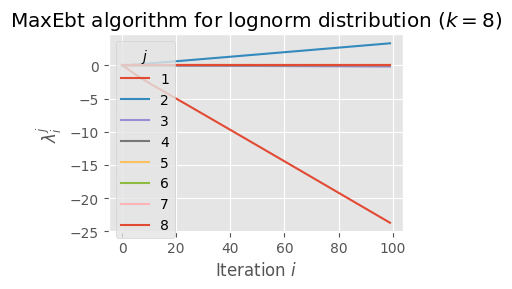

In [8]:
#Using all moments
mu = 0
s2 = 1

l = 0
n = 350

u = lognorm.ppf(1 - 10**(-7), s=s2, loc=mu, scale=1)
print(u)

for k in [1,2,3,4,5,7,8]:
    ob_skewkurt = MaxEnt(support=[l,u],
                        n_quadrature=n,
                        b_constraints=b_moment_lognormal(mu,s2,k),
                        f_vector=f_moments,
                        f_param=[k])
    if ob_skewkurt._converges:
        ob_skewkurt.visualize_solution(xlim=[l,l+10],
                                    actual_density=pdf_lognorm,
                                    actual_param=[mu,s2], 
                                    title=f"MaxEnt for lognormal distribution",
                                    title_save=f"figs/lognorm_moments_{k}.pdf")
        print(f"Lagrange parameters: {ob_skewkurt.get_la()}")
    else:
        ob_skewkurt.visualize_algorithm(title=f"MaxEbt algorithm for lognorm distribution ($k={k}$)")

181.15220369401933
The algorithm may not be converging.
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = nan
  Lambda_2 = nan
  Lambda_3 = nan
  Lambda_4 = nan
  Lambda_5 = nan
  Lambda_6 = nan


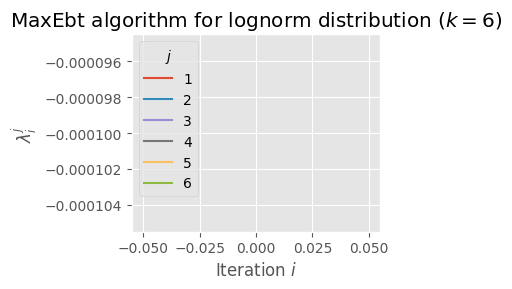

In [10]:
#WEIRD CASE where algorithm doesn't work || k=6
#because system can't be solved -> nan's
mu = 0
s2 = 1

l = 0
n = 350

u = lognorm.ppf(1 - 10**(-7), s=s2, loc=mu, scale=1)
print(u)

for k in [6]:
    if(k==6):
        start=np.full(6,-0.0001)
    else:
        start = None
    ob_skewkurt = MaxEnt(support=[l,u],
                        n_quadrature=n,
                        b_constraints=b_moment_lognormal(mu,s2,k),
                        f_vector=f_moments,
                        f_param=[k],
                        start=start)
    if ob_skewkurt._converges:
        ob_skewkurt.visualize_solution(xlim=[l,l+10],
                                    actual_density=pdf_lognorm,
                                    actual_param=[mu,s2], 
                                    title=f"MaxEnt density for lognorm distribution ($k={k}$)")
        print(f"Lagrange parameters: {ob_skewkurt.get_la()}")
    else:
        ob_skewkurt.visualize_algorithm(title=f"MaxEbt algorithm for lognorm distribution ($k={k}$)")